In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [6]:
import deepmatcher as dm
import pandas as pd
from utils.triangles_method import explainSamples
from utils.deepmatcher_utils import wrapDm
import numpy as np
import ast

## Rnn model
We choose rnn model because it had strange rankings

In [4]:
hybrid = dm.MatchingModel(attr_summarizer='hybrid')
hybrid.load_state('../../models/dblp_acm_hybrid.pth')
hybrid = hybrid.to('cuda')

In [7]:
DATA_DIR ='../../datasets/Structured/DBLP-ACM/'
allsamples_frac = pd.read_csv('dblp_acm_dataset_02.csv')
dblp = pd.read_csv(DATA_DIR+'tableA.csv',dtype=str)
acm = pd.read_csv(DATA_DIR+'tableB.csv',dtype=str)

In [8]:
prediction = wrapDm(allsamples_frac,hybrid,ignore_columns=['label'])
correct4hybrid = allsamples_frac[np.argmax(prediction,axis=1)==allsamples_frac.label.values]
len(allsamples_frac),len(correct4hybrid)

(2473, 2463)

In [23]:
neg_ranking4hybrid,flippedneg4hybrid = explainSamples(correct4hybrid,[dblp,acm],hybrid,wrapDm,
                                       class_to_explain=0,maxLenAttributeSet=1)


 39%|███▉      | 309/788 [01:36<02:22,  3.37it/s]


 78%|███████▊  | 617/788 [03:10<01:05,  2.60it/s]


100%|██████████| 788/788 [04:04<00:00,  3.22it/s]


In [24]:
pos_ranking4hybrid,flippedpos4hybrid = explainSamples(correct4hybrid,[dblp,acm],hybrid,wrapDm,
                                       class_to_explain=1,maxLenAttributeSet=1)


 39%|███▉      | 309/788 [01:34<02:20,  3.42it/s]


 78%|███████▊  | 617/788 [03:05<00:56,  3.05it/s]


100%|██████████| 788/788 [03:59<00:00,  3.29it/s]


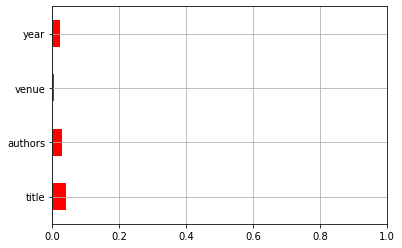

In [35]:
neg_ranking4hybrid.plot.barh(color='red',grid=True,xlim=(0,1)).get_figure().savefig('hybrid_neg_ranking.png')

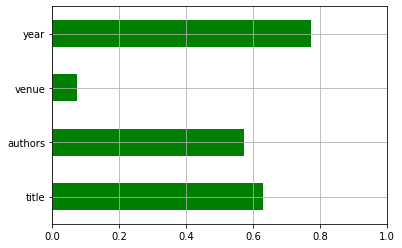

In [36]:
pos_ranking4hybrid.plot.barh(color='green',grid=True,xlim=(0,1)).get_figure().savefig('hybrid_pos_ranking.png')

In [37]:
flippedpos4hybrid.to_csv('hybrid_flippedpos.csv',index=False)
flippedneg4hybrid.to_csv('hybrid_flippedneg.csv',index=False)
allsamples_frac.to_csv('dblp_acm_dataset_02.csv',index=False)

In [5]:
rnn = dm.MatchingModel(attr_summarizer='rnn')
rnn.load_state('../../models/dblp_acm_rnn.pth')
rnn = rnn.to('cuda')

In [17]:
prediction = wrapDm(allsamples_frac,rnn,ignore_columns=['label'])
correct4rnn = allsamples_frac[np.argmax(prediction,axis=1)==allsamples_frac.label.values]
len(allsamples_frac),len(correct4rnn)

(2473, 2466)

In [18]:
neg_ranking4rnn,flippedneg4rnn = explainSamples(correct4rnn,[dblp,acm],rnn,wrapDm,
                                       class_to_explain=0,maxLenAttributeSet=1)

100%|██████████| 790/790 [02:18<00:00,  5.71it/s]


In [ ]:
pos_ranking4rnn,flippedpos4rnn = explainSamples(correct4rnn,[dblp,acm],rnn,wrapDm,
                                       class_to_explain=1,maxLenAttributeSet=1)

 71%|███████▏  | 563/790 [01:34<00:36,  6.22it/s]

In [ ]:
neg_ranking4rnn.plot.barh(color='red',grid=True,xlim=(0,1)).get_figure().savefig('rnn_neg_ranking.png')

In [ ]:
pos_ranking4rnn.plot.barh(color='green',grid=True,xlim=(0,1)).get_figure().savefig('rnn_pos_ranking.png')

## Extract patterns

### Hybrid

In [9]:
from utils.patternDiscovery import getMaxFrequentPatterns

In [29]:
pattern_on_title_4neg = getMaxFrequentPatterns(flippedpos4hybrid[flippedpos4hybrid.alteredAttributes==('title',)],
                                              ['ltable_title','rtable_title'])
pattern_on_title_4neg.head(15)

,support,itemsets
0,0.203629,(L_system)
1,0.207661,(R_data)
2,0.219758,(L_databases)
3,0.221774,(L_data)
4,0.229839,(L_database)
5,0.250000,(R_:)
6,0.256048,(R_a)
7,0.270161,(R_database)
8,0.290323,(L_a)
9,0.340726,(L_:)


In [30]:
pattern_on_authors_4neg = getMaxFrequentPatterns(flippedpos4hybrid[flippedpos4hybrid.alteredAttributes==('authors',)],
                                              ['ltable_authors','rtable_authors'])
pattern_on_authors_4neg.head(15)

,support,itemsets
0,0.822616,"(R_,, L_,)"


In [33]:
pattern_on_year_4neg = getMaxFrequentPatterns(flippedpos4hybrid[flippedpos4hybrid.alteredAttributes==('year',)],
                                              ['ltable_year','rtable_year'],min_support=0.2)
pattern_on_year_4neg.head(15)

,support,itemsets


### RNN

In [7]:
flippedpos4rnn = pd.read_csv('rnn_flippedpos.csv')
flippedpos4rnn['alteredAttributes'] = flippedpos4rnn['alteredAttributes'].apply(lambda t:ast.literal_eval(t))

In [10]:
pattern_on_title_4neg = getMaxFrequentPatterns(flippedpos4rnn[flippedpos4rnn.alteredAttributes==('title',)],
                                              ['ltable_title','rtable_title'])
pattern_on_title_4neg.head(15)

,support,itemsets
0,0.201566,(L_and)
1,0.205479,(R_in)
2,0.211350,(L_databases)
3,0.213307,(L_in)
4,0.217221,(L_data)
5,0.217221,(R_data)
6,0.227006,(R_a)
7,0.232877,(R_:)
8,0.236791,(L_database)
9,0.254403,(L_a)


In [12]:
pattern_on_authors_4neg = getMaxFrequentPatterns(flippedpos4rnn[flippedpos4rnn.alteredAttributes==('authors',)],
                                              ['ltable_authors','rtable_authors'])
pattern_on_authors_4neg.head(15)

,support,itemsets
0,0.802139,"(L_,, R_,)"


In [14]:
pattern_on_year_4neg = getMaxFrequentPatterns(flippedpos4rnn[flippedpos4rnn.alteredAttributes==('year',)],
                                              ['ltable_year','rtable_year'],min_support=0.1)
pattern_on_year_4neg.head(15)

,support,itemsets
0,0.102041,(R_2002)
1,0.103499,(R_1994)
2,0.103499,(R_1996)
3,0.103499,(R_1998)
4,0.104956,(L_1998)
5,0.107872,(R_2001)
6,0.115160,(L_2001)
7,0.120991,(R_1995)
8,0.126822,(L_1995)
9,0.183673,(L_1997)
